# Green Spaces in Pittsburgh

Green spaces are places in cities that are reserved for things such as parks, wildlife preservation, and evironmental preservation. In any urban setting, especially a heavily industrial area such as Pittsburgh. For a neighborhood to be considered an environmentally friendly place, green spaces are something that should be taken into account.

In [ ]:
# imports
import pandas as pd
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

## Dataset

The dataset I chose to work with is the Inventory of City of Pittsburgh Green Spaces, maintained by the Operations Division of the Department of Public Works. Much of this data is either unusable or trivial, but the dataset reports the total acreage of green spaces for every neighborhood. We'll be using that as the biggest indicator for which neighborhood excels in green spaces.

In [2]:
# opens the green space dataset
green_space_data = pd.read_csv("https://data.wprdc.org/dataset/cd9ae013-5b93-43d6-8793-bccf10f12c72/resource/b06fa202-ead7-491c-b8f6-2702dd35f8dd/download/opendata-pubworks-operations-green-spaces-2015.csv")
green_space_data = green_space_data.groupby("Neighborhood").sum() # finds sum of all values by neighborhood
green_space_data = green_space_data[['Total Acreage']] # narrows down the total acreage by neighborhood
green_space_data.head(len(green_space_data)) # displays data for every neighborhood

,Total Acreage
Neighborhood,
Beechview,0.10
Brookline,0.10
Central Business District,1.24
Central Oakland,1.70
Crawford Roberts,0.30
East Liberty,4.15
North Oakland,0.10
Point Breeze,1.12
Point Breeze North,1.40


## Readability

For anyone not too familiar with Pittsburgh, the layout of the above data is not very useful. It's easier to put the data in perspective by mapping it out.

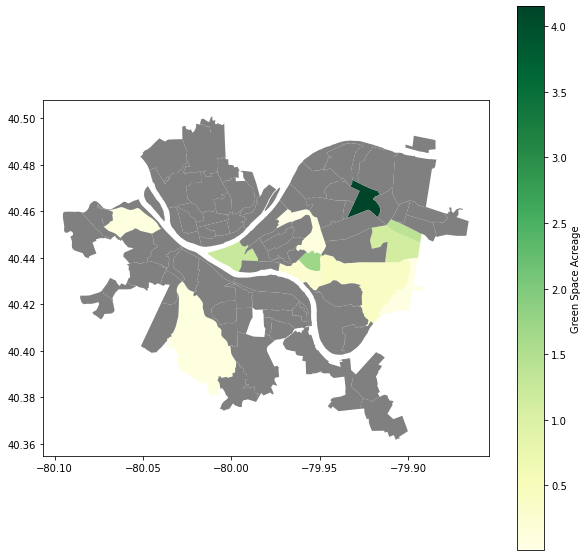

In [8]:
hood_map = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # opens map shape. this will be used later too
green_space_map = hood_map.merge(green_space_data, how='left', left_on='hood', right_on='Neighborhood') # merges data by neighborhood
green_space_map.plot(column='Total Acreage', # plots the data using a map of Pittsburgh
                     cmap='YlGn', 
                     legend=True, 
                     legend_kwds={'label':"Green Space Acreage"}, 
                     missing_kwds={'color':'grey'}, 
                     figsize=(10, 10))

## What the numbers mean

The above dataframe represents the acreage, in total, of green space in each neighborhood. This is a good start, but it's only really useful if all the neighborhoods are similarly sized, which they definitely aren't. When analyzing data like this, it's important to take the total size in acres of each neighborhood, and use that to get a percentage of green space in the neighborhood.

To do this, we'll be using another dataset, this time a dataset that has general data for each neighborhood, such as the total acreage of each neighborhood.

In [4]:
# general data about every neighborhood in Pittsburgh
hood_data = pd.read_csv("https://data.wprdc.org/datastore/dump/668d7238-cfd2-492e-b397-51a6e74182ff")

hood_data = hood_data[['hood', 'acres']] # narrow down the data to just what i need

#merge the green space data and general neighborhood data for easy calculation
total_data = green_space_data.merge(hood_data, how='inner', left_on='Neighborhood', right_on='hood')

total_data['Green Percentage'] = (total_data['Total Acreage'] / total_data['acres']) * 100 # multiply by 100 for easy readability
total_data.head(len(total_data))

,Total Acreage,hood,acres,Green Percentage
0,0.10,Beechview,938.804,0.010652
1,0.10,Brookline,1338.669,0.007470
2,1.24,Central Business District,411.593,0.301268
3,1.70,Central Oakland,180.883,0.939834
4,4.15,East Liberty,373.650,1.110665
5,0.10,North Oakland,320.679,0.031184
6,1.12,Point Breeze,645.695,0.173457
7,1.40,Point Breeze North,183.781,0.761776
8,0.01,Polish Hill,163.677,0.006110
9,0.01,Regent Square,123.682,0.008085


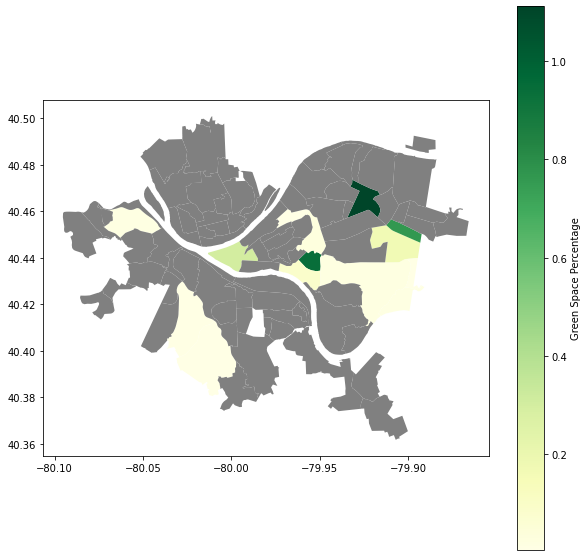

In [6]:
total_map = hood_map.merge(total_data, how='left', left_on='hood', right_on='hood') # merge appropriate data for map
total_map.plot(column='Green Percentage', 
               cmap='YlGn', 
               legend=True, 
               legend_kwds={'label':"Green Space Percentage"}, 
               missing_kwds={'color':'grey'}, figsize=(10,10))

## Analysis

East Liberty has the highest proportion of green space acreage to total acreage. However, it's worth mentioning that many neighborhoods in the southeast region of Pittsburgh have at least some green space, while other regions of Pittsburgh have isolated neighborhoods with green space in them. Prominent neighborhoods in that area include Point Breeze, which features the Homewood Cemetary, Central and South Oakland, which contain parts of Schenley Park, and Squirrel Hill, which contains most of Schenley Park as well as parts of Frick Park.

Notably, while East Liberty has the most green space per acre, there are no large, notable Pittsburgh parks within neighborhood lines. Thus, East Liberty's top spot in the data is a little misleading, but it is still worth analyzing nonetheless.

In short, East Liberty tops the list, but the large spot of green in southeast Pittsburgh should not be ignored.